# Importing libraries and functions

Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
import os
import sys



In [4]:
def make_dir(path): # Function to make adirectory to save files in
    cwd = os.getcwd()
    abs_path = cwd + path


    if not os.path.exists(abs_path):
        try: 
            os.makedirs(abs_path)
            print(abs_path)
        except OSError:return 0
        else: return 1
    else: return 2

In [5]:
# Declaring Variables
num_epochs = 200000
save_dir = 'model-checkpoint/SeparateAndNormalised/'

# Declaring parameters
loss_max = "mean_squared_error"
metrics_max = ["mape"]
optimizer_max = tf.keras.optimizers.SGD(learning_rate=0.003,
                                        momentum=0.1,
                                        nesterov=True)

loss_ind = "mean_squared_error"
metrics_ind = ["mape"]
optimizer_ind = tf.keras.optimizers.RMSprop(learning_rate=0.003,
                                           momentum=0.1)



# Filepaths for saving Model Checkpoints:
save_model_max = save_dir+'model_max'
save_model_ind = save_dir+'model_ind'

In [6]:
# Reading data from .csv file
data_dat = pd.read_csv (r'data.csv')
pred_dat = pd.read_csv (r'test.csv')

In [7]:
# Extracting data into numpy arrays from pandas DataFrames

# Training data
X = pd.DataFrame(data_dat, columns = ['LD'])
X = X.to_numpy()

X_n = pd.DataFrame(data_dat, columns = ['XL'])
X_n = X_n.to_numpy()


y = pd.DataFrame(data_dat, columns = ['Ma'])
y = y.to_numpy()

# Prediction data
X_pred = pd.DataFrame(pred_dat, columns = ['LD'])
X_pred = X_pred.to_numpy()
X_pred_ns = X_pred

X_n_pred = pd.DataFrame(pred_dat, columns = ['XL'])
X_n_pred = X_n_pred.to_numpy()

y_pred = pd.DataFrame(pred_dat, columns = ['Ma'])
y_pred = y_pred.to_numpy()



In [8]:
# Returns normalised valeus of Mach Number and Maximum Mach Number per L/D ratio as two arrays

def get_norm_y(y,c): 
    num = int(y.shape[0] / c)
    max_val = np.zeros(num)
    y_norm = np.zeros([num*c])
    for i in range(num):
        max_val[i] = max(y[i*c:(i+1)*c])
        for j in range(c):
            y_norm[i*c + j] = y[i*c+j]/max_val[i]
    return y_norm, max_val
    
y_norm, max_y = get_norm_y(y, 201)
y_pred_norm, y_pred_max = get_norm_y(y_pred, 201)

# Returns Input set fro training the Max Mach Numbers

def get_x(x,c):
    num = int(x.shape[0]/c)
    x_n = np.zeros([num])
    
    for i in range(num):
        x_n[i] = x[i*c]
    
    return x_n

X_max = get_x(X,201)
X_pred_max = get_x(X_pred, 201)

X= np.hstack((X_n,X))
X_pred = np.hstack((X_n_pred,X_pred))

In [9]:
print(X_max)

[7. 9. 5.]


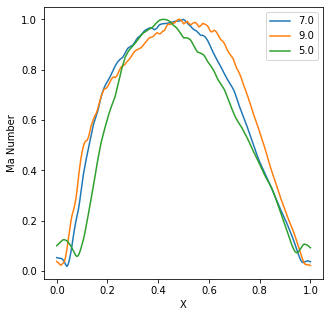

In [10]:
# Plot the values of normalised Mach Numbers of training set

fig2 = plt.figure()
for i in range(max_y.shape[0]):
    plt.plot(X_n[:201],y_norm[i*201:(i+1)*201], label=str(X_max[i]))

plt.xlabel("X")
plt.ylabel("Ma Number")
# plt.title('%s Loss Function for %s epochs \n Prediction vs Actual' %(loss_func_name, str(num_epochs)))
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_size_inches(5, 5)
# plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
plt.show()
plt.close(fig2)

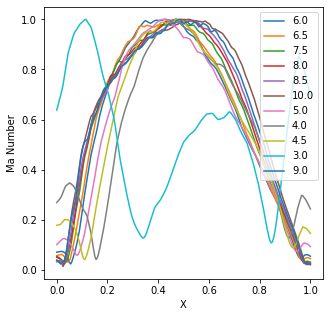

In [11]:
# Plot the values of normalised Mac Numbers of predict set

fig2 = plt.figure()
for i in range(X_pred_max.shape[0]):
    plt.plot(X_n_pred[:201],y_pred_norm[i*201:(i+1)*201], label=str(X_pred_max[i]))

plt.xlabel("X")
plt.ylabel("Ma Number")
# plt.title('%s Loss Function for %s epochs \n Prediction vs Actual' %(loss_func_name, str(num_epochs)))
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_size_inches(5, 5)
# plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
plt.show()
plt.close(fig2)

# Training for Maximum Mach Number per L/D ratio

DONOT RUN THIS IF YOU DONOT WANT TO RETRAIN THE MODEL

In [ ]:
# Setting up the model
model_max = Sequential([
        Dense(20, activation = 'relu', input_shape=[1,]),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ])

#print(model_max.summary())

In [ ]:
# Compiling the model
model_max.compile(loss=loss_max, optimizer=optimizer_max, metrics=metrics_max)

In [ ]:
early_stopping_callback_max = EarlyStopping(monitor='loss', 
                                        patience=150,
                                        min_delta= 1e-3,
                                        restore_best_weights=True,
                                        mode='auto')
checkpoint_callback_max = ModelCheckpoint(filepath=save_model_max,
                                          monitor='loss',
                                          verbose=1,
                                          save_weights_only=False,
                                          save_best_only=True,
                                          mode='auto')

In [ ]:
print(save_model_max)

In [ ]:
val_makedir = make_dir('/'+save_dir)

if val_makedir == 1:
    print('Directory has been created')
elif val_makedir == 2:
    print('Directory already exists')
else:
    print('Failed to create directory')
    sys.exit(0)

In [ ]:
# Training the net on training data
history_max = model_max.fit(X_max,
                            max_y,
                            batch_size=3,
                            epochs=num_epochs,
                            verbose=0,
                            validation_split=0,
                            callbacks=[early_stopping_callback_max,
                                       checkpoint_callback_max])

## Training for individual normalised Mach Numbers per x-coordinate

DONOT RUN THIS IF YOU DONOT WANT TO RETRAIN THE MODEL


In [ ]:
##### Using sklearn to split the data into train and test sets with shuffling ####
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
#### Load Model
model_ind = Sequential([
            Dense(5, activation = 'relu', input_shape=X_train[0].shape),
            Dense(20, activation = 'relu'),
            Dense(50, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(5, activation = 'relu', input_shape=X_train[0].shape),
            Dense(1, activation = 'linear')
        ])


In [ ]:
#### Compile the model
model_ind.compile(loss=loss_ind, optimizer=optimizer_ind, metrics=metrics_ind)


In [ ]:
early_stopping_callback_ind = EarlyStopping(monitor='val_'+metrics_ind[0], 
                                        patience=500,
                                        min_delta= 1e-7,
                                        restore_best_weights=True,
                                        mode='auto')
checkpoint_callback_ind = ModelCheckpoint(filepath=save_model_ind,
                                          monitor='val_'+metrics_ind[0],
                                          verbose=1,
                                          save_weights_only=False,
                                          save_best_only=True,
                                          mode='auto')

In [ ]:
# Training the net on training data
history_ind = model_ind.fit(X_train, y_train, batch_size=20, epochs=num_epochs, verbose=1,
                        validation_data=(X_test,y_test),
                        callbacks=[early_stopping_callback_ind,
                                   checkpoint_callback_ind])


# Prediction and Results

In [12]:
#### Load Models

model_ind = tf.keras.models.load_model(save_model_ind)
model_max = tf.keras.models.load_model(save_model_max)

In [13]:
# Predictions for training, loss and predicting set
pred_max = model_max.predict(X_pred_max)


In [14]:
print(abs(pred_max.flatten()-y_pred_max)/y_pred_max)

[0.02944723 0.05182153 0.05850071 0.03938338 0.01865512 0.09832442
 0.04770695 0.54603373 0.26347911 1.4195463  0.01201548]


In [15]:
def sort_ascend(X,Y):
    x_ord=[]
    y_ord=[]
    for x, y in zip(X,Y):
        if len(x_ord)==0:
            x_ord.append(x)
            y_ord.append(y)
        elif x>=max(x_ord): 
            x_ord.insert(len(x_ord),x)
            y_ord.insert(len(y_ord),y)
        elif x<=min(x_ord): 
            x_ord.insert(0,x)
            y_ord.insert(0,y)
        else: 
            max_ind = 0
            for j in range(len(x_ord)):
                if x<=x_ord[j]:
                    max_ind=j
                    break
            x_ord.insert(max_ind,x)
            y_ord.insert(max_ind,y)
            
    return x_ord, y_ord

Xpm_sort, Ypm_sort = sort_ascend(X_pred_max, y_pred_max)
Xpm_sort, pred_sort = sort_ascend(X_pred_max, pred_max)

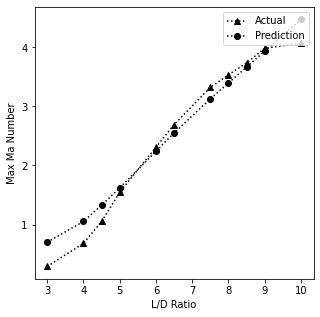

In [16]:
fig2 = plt.figure()
# plt.plot(X, pred, 'r', label='Prediction')
plt.plot(Xpm_sort, Ypm_sort, '^k:', label='Actual')
plt.plot(Xpm_sort, pred_sort, 'ok:', label='Prediction')
# plt.plot(X_n[2001:4002],y[1], 'r', label='9')
# plt.plot(X_n[4002:6003],y[2], 'b', label='7')
plt.xlabel("L/D Ratio")
plt.ylabel("Max Ma Number")
# plt.title('%s Loss Function for %s epochs \n Prediction vs Actual' %(loss_func_name, str(num_epochs)))
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_size_inches(5, 5)
# plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
plt.show()
plt.close(fig2)

In [17]:
# Predictions for training, loss and predictin set
y_ind_pred = model_ind.predict(X_pred)

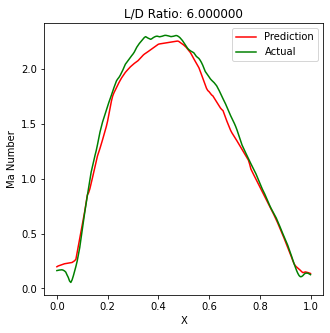

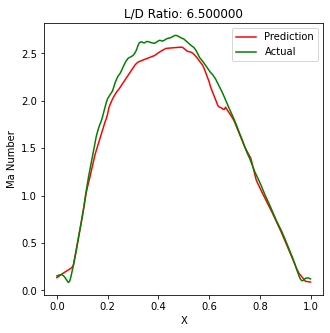

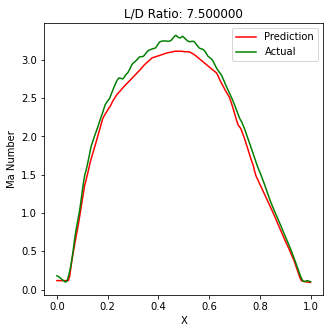

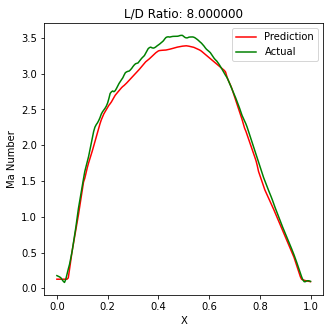

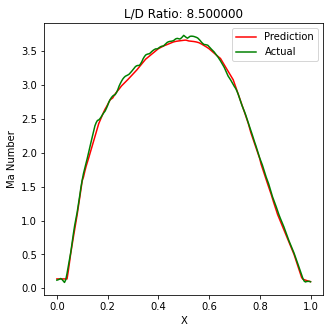

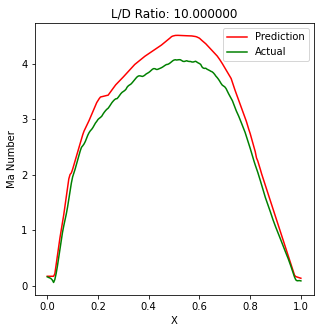

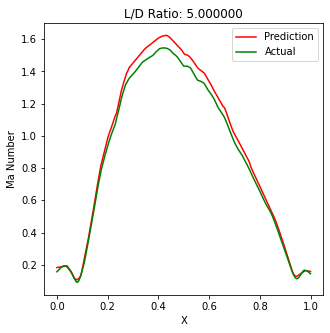

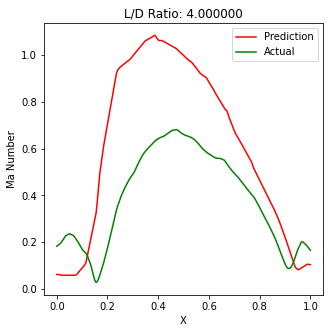

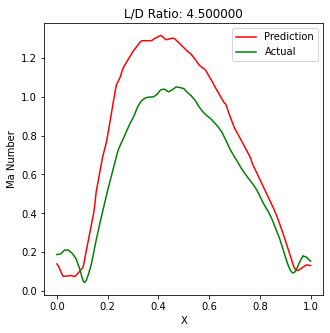

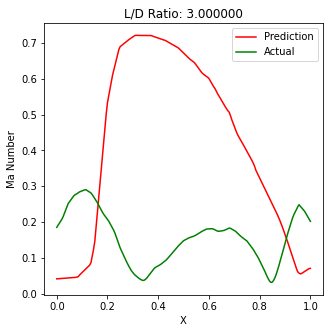

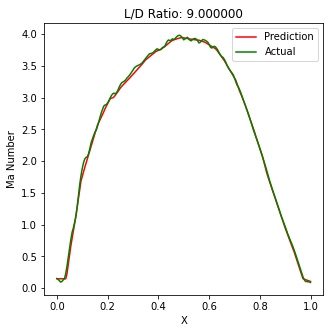

In [16]:
nrows = len(X_pred_max)
ncols = 1 

subplot(nrows, ncols)


for i in range(len(X_pred_max)):
    fig1 = plt.figure()
    plt.plot(X_n_pred[i*201:(i+1)*201], y_ind_pred[i*201:(i+1)*201]*pred_max[i], 'r', label='Prediction')
    plt.plot(X_n_pred[i*201:(i+1)*201], y_pred[i*201:(i+1)*201], 'g', label='Actual')
    plt.xlabel("X")
    plt.ylabel("Ma Number")
    plt.title('L/D Ratio: %f' %X_pred_max[i])
    plt.legend(loc="upper right")
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    # plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
    plt.show()
    plt.close(fig1)

In [17]:
pred =np.zeros(y_ind_pred.shape)
for i in range(pred_max.shape[0]):
    for j in range(201):
        pred[i*201+j] = y_ind_pred[i*201+j]*pred_max[i]

In [18]:
def get_APE(pred,y_true):
    APE = np.zeros(y_true.shape[0])
    for i in range(y_true.shape[0]):
        APE[i] = abs((pred[i] - y_true[i]) / y_true[i])

    return APE

def get_max_APE(APE):
    max_APE = np.zeros(1)

    for i in range(30,172):
        if APE[i] > max_APE:
            max_APE = APE[i]
    return max_APE

In [19]:
pred_APE = get_APE(pred, y_pred)

In [20]:
print(X_pred_max)

[ 6.   6.5  7.5  8.   8.5 10.   5.   4.   4.5  3.   9. ]


In [28]:
for k in range(pred_max.shape[0]):
    print('For L/D Ratio %f, max APE is %f percent' %(X_pred_max[k],get_max_APE(pred_APE[k*201:(k+1)*201])*100))

For L/D Ratio 6.000000, max APE is 10.652833 percent
For L/D Ratio 6.500000, max APE is 10.677001 percent
For L/D Ratio 7.500000, max APE is 10.688319 percent
For L/D Ratio 8.000000, max APE is 9.036293 percent
For L/D Ratio 8.500000, max APE is 6.783062 percent
For L/D Ratio 10.000000, max APE is 13.096706 percent
For L/D Ratio 5.000000, max APE is 5.769828 percent
For L/D Ratio 4.000000, max APE is 1054.571601 percent
For L/D Ratio 4.500000, max APE is 94.735432 percent
For L/D Ratio 3.000000, max APE is 1856.390333 percent
For L/D Ratio 9.000000, max APE is 3.129490 percent
